In [168]:
import pandas as pd

data = pd.read_csv('melb_data.csv')

cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

X = data[cols_to_use]
y = data.Price

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[
            ('preprocess', SimpleImputer()),
            ('model', RandomForestRegressor(n_estimators = 50, random_state=0))
])

In [9]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

scores

array([301628.7893587 , 303164.4782723 , 287298.331666  , 236061.84754543,
       260383.45111427])

In [170]:
df = data.select_dtypes(exclude='object')
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [171]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [13]:
df['Bathroom'].value_counts()

1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64

In [15]:
df[df['Bathroom'] >= 7.0]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
379,8,2950000.0,11.0,3147.0,9.0,7.0,4.0,1472.0,618.0,2009.0,-37.87290,145.07880,3052.0
580,5,3900000.0,9.7,3103.0,5.0,7.0,6.0,0.0,NaN,NaN,-37.80490,145.07480,5682.0
4980,4,760000.0,8.8,3072.0,9.0,8.0,7.0,1254.0,280.0,1928.0,-37.73670,144.98950,14577.0
10611,8,2200000.0,7.7,3124.0,8.0,8.0,4.0,650.0,NaN,NaN,-37.84812,145.07414,8920.0


In [22]:
df.shape

(13580, 13)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df.shape

(13580, 13)

In [27]:
columns = df.columns.to_list()
columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

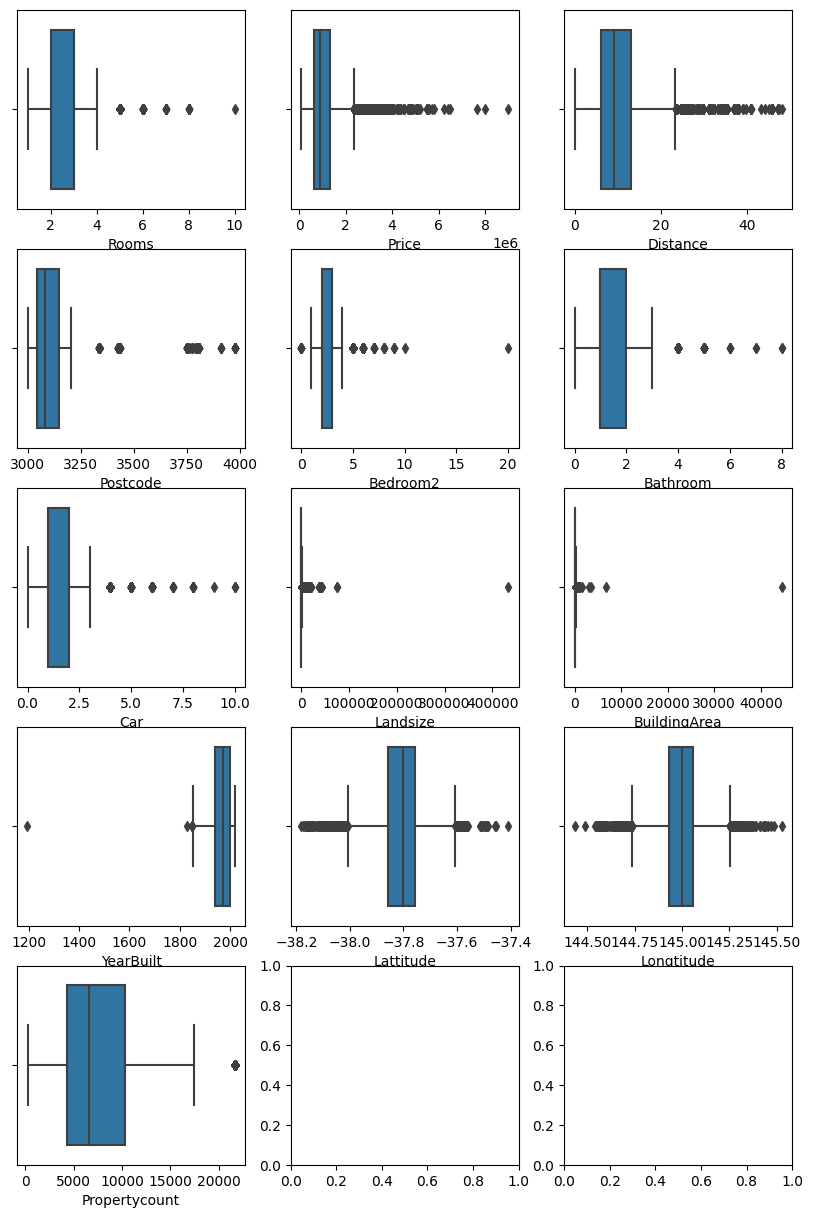

In [29]:
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(10,15))

x, y = 0, 0
for i, col in enumerate(df.columns.to_list()):
    sns.boxplot(x=df[col], ax=ax[x,y])

    if y < ncols-1:
        y += 1
    elif y == ncols-1:
        x += 1
        y = 0
plt.show()

<Figure size 1200x600 with 0 Axes>

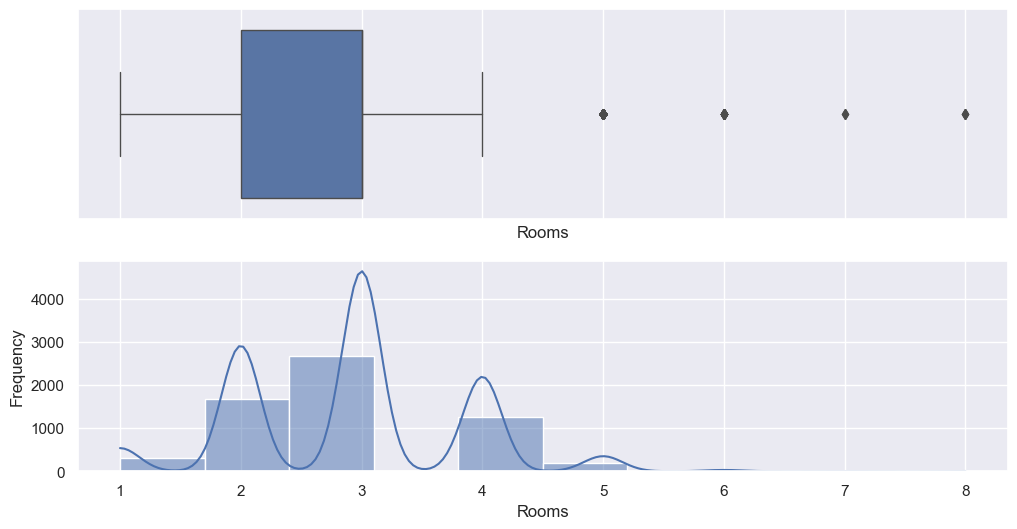

<Figure size 1200x600 with 0 Axes>

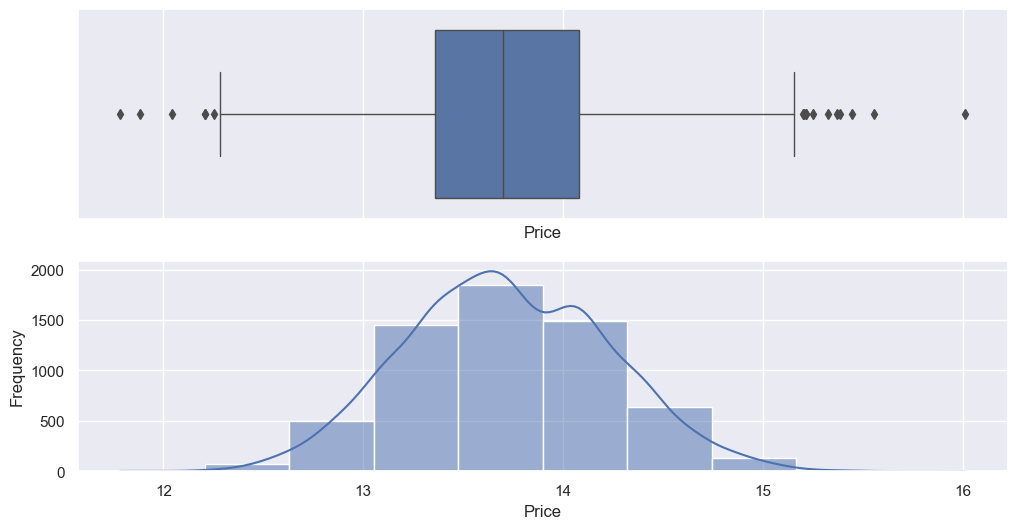

<Figure size 1200x600 with 0 Axes>

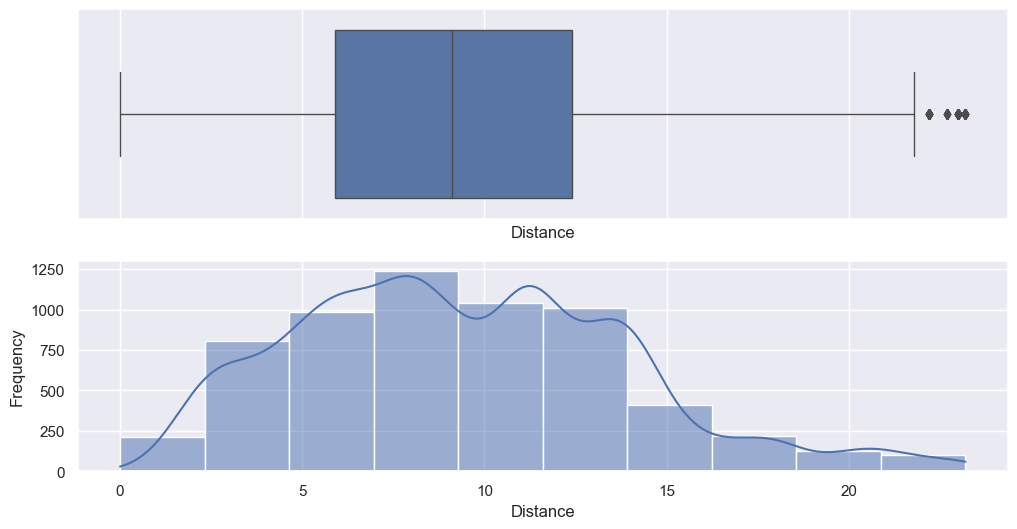

<Figure size 1200x600 with 0 Axes>

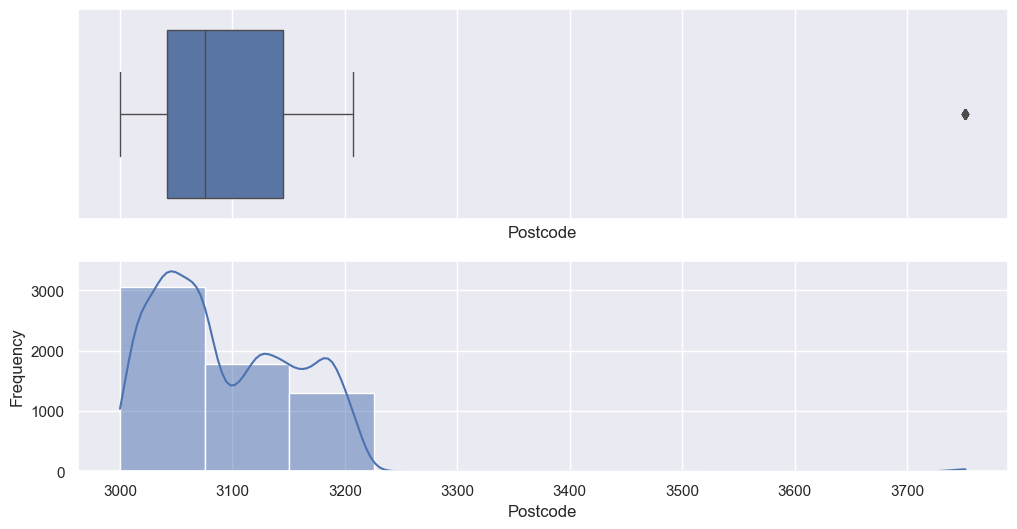

<Figure size 1200x600 with 0 Axes>

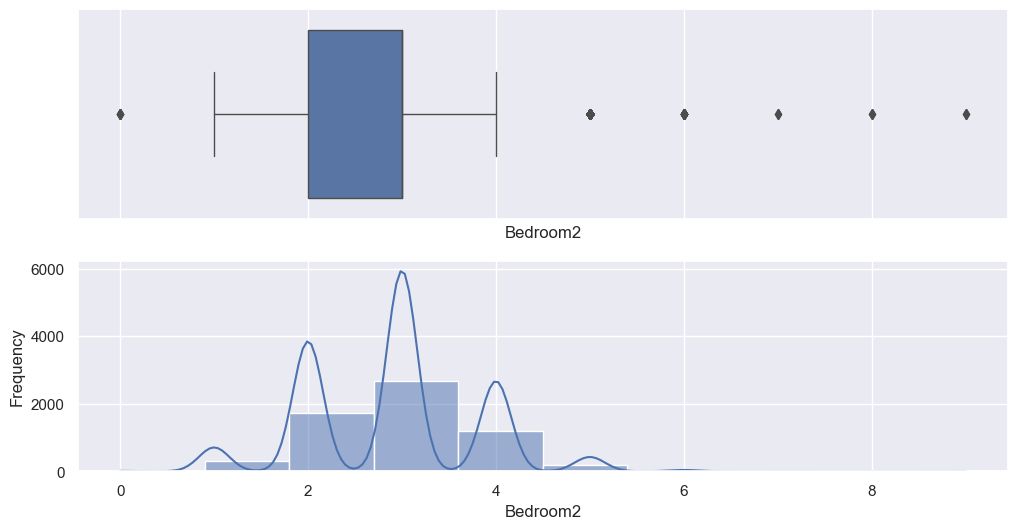

<Figure size 1200x600 with 0 Axes>

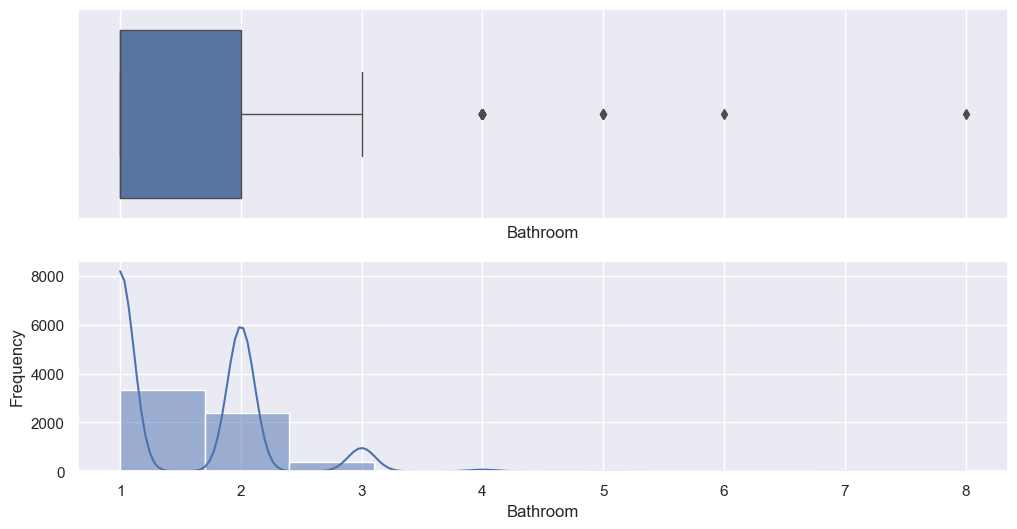

<Figure size 1200x600 with 0 Axes>

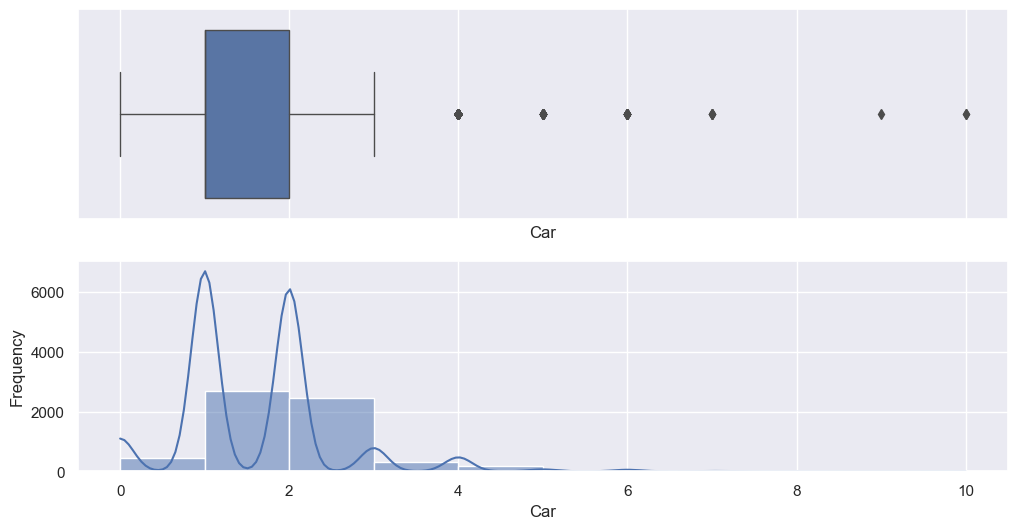

<Figure size 1200x600 with 0 Axes>

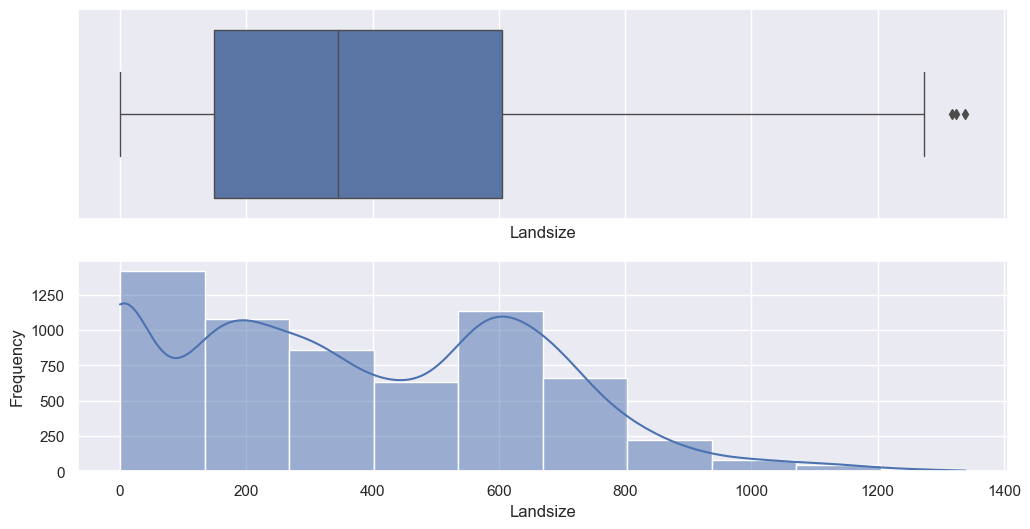

<Figure size 1200x600 with 0 Axes>

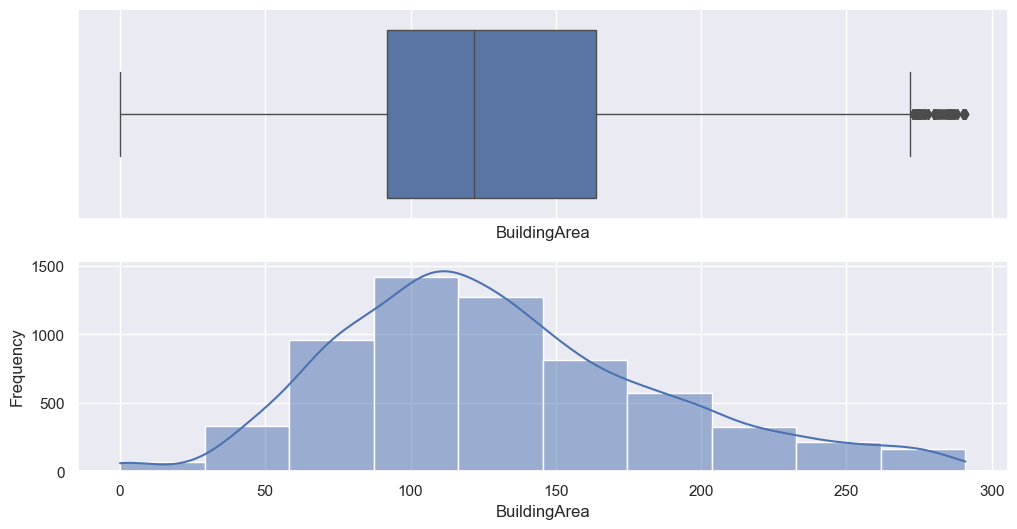

<Figure size 1200x600 with 0 Axes>

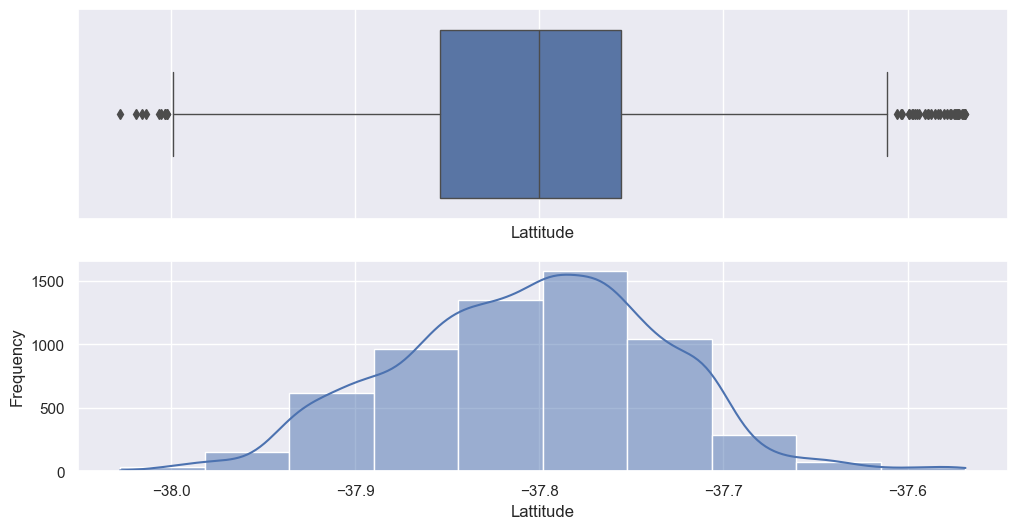

<Figure size 1200x600 with 0 Axes>

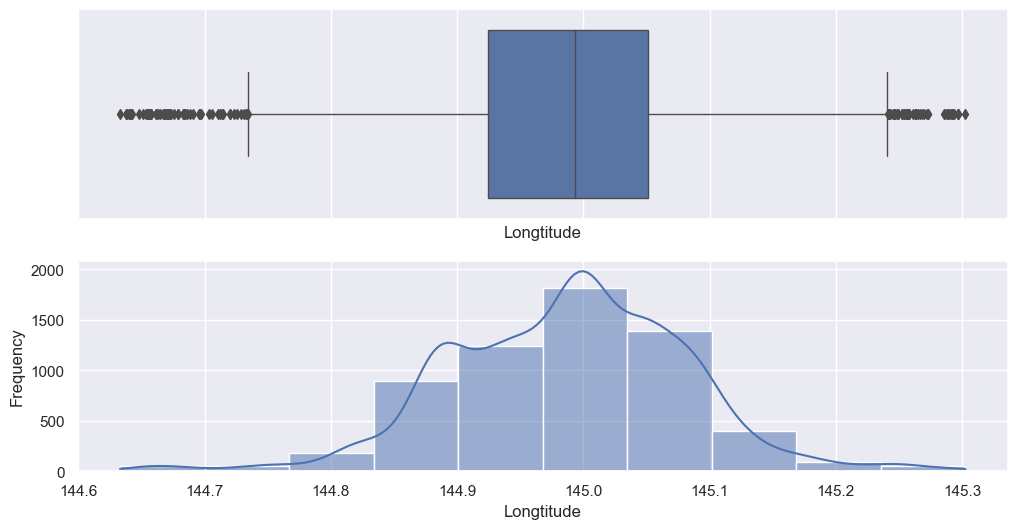

<Figure size 1200x600 with 0 Axes>

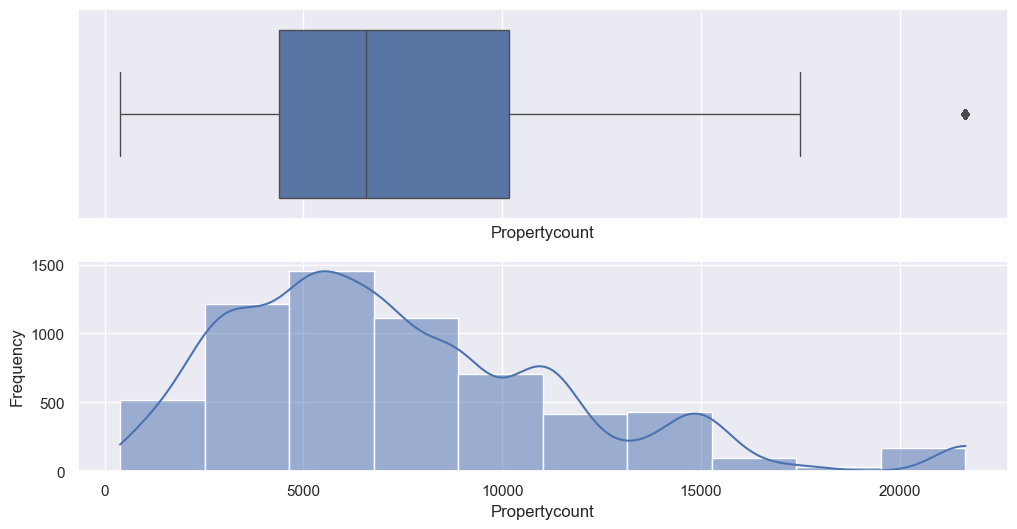

<Figure size 1200x600 with 0 Axes>

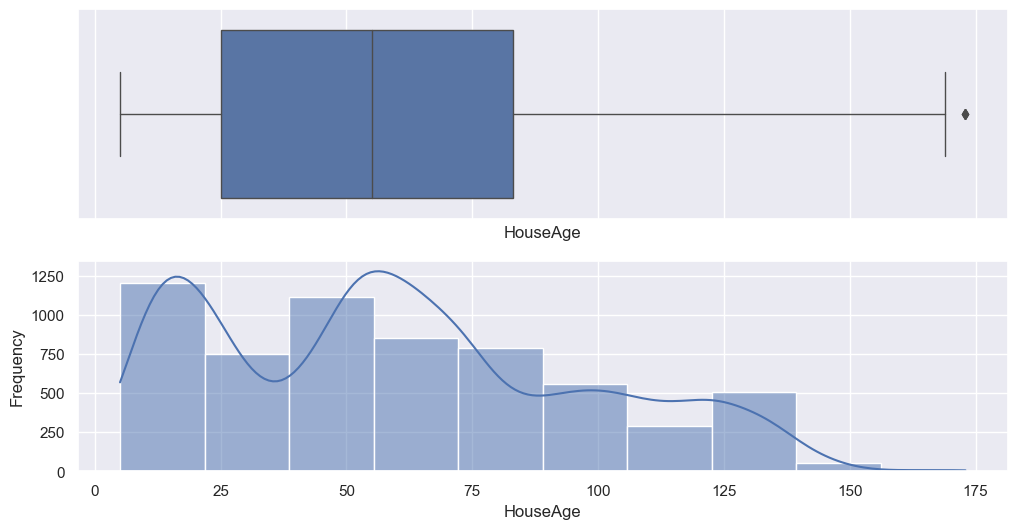

In [228]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(12, 6)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(x=df[i], ax=ax_hist , bins = 10,kde=True)
    plt.show()

In [172]:
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [46]:
df['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [52]:
df[df['Landsize'] > 10000]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
687,3,2000000.0,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,-37.80020,145.07000,7809.0
2084,3,950000.0,1.6,3066.0,3.0,2.0,1.0,15900.0,NaN,NaN,-37.80350,144.98500,4553.0
2487,3,1425000.0,9.4,3041.0,3.0,2.0,2.0,10100.0,NaN,NaN,-37.73760,144.89540,1308.0
3750,2,352500.0,9.2,3012.0,2.0,1.0,1.0,15100.0,66.0,2012.0,-37.77950,144.87290,3873.0
3942,2,495000.0,8.7,3032.0,2.0,2.0,2.0,37000.0,NaN,NaN,-37.77520,144.89250,4918.0
4706,2,1340000.0,3.8,3207.0,2.0,2.0,2.0,21700.0,NaN,2000.0,-37.84240,144.94490,8648.0
5194,3,572000.0,11.2,3073.0,3.0,1.0,2.0,41400.0,NaN,NaN,-37.71040,145.02570,21650.0
5584,1,315000.0,3.3,3141.0,1.0,1.0,0.0,14500.0,NaN,2011.0,-37.83720,144.99630,14887.0
5592,2,978500.0,3.3,3141.0,2.0,2.0,2.0,17200.0,NaN,2000.0,-37.83610,144.99660,14887.0
5694,2,827000.0,3.3,3141.0,2.0,2.0,2.0,17200.0,NaN,2000.0,-37.83610,144.99660,14887.0


In [64]:
df['Landsize'].quantile(0.99)

2959.82999999998

In [179]:
Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

outliers = []

for out in df['Landsize']:
    if out < lower_tail or out > upper_tail:
        outliers.append(out)

In [180]:
upper_tail

1345.0

In [181]:
outliers

[1353.0, 1357.0, 1347.0, 1348.0]

In [77]:
lower_tail

-534.0

In [182]:
df.drop(df[df['Landsize'] > upper_tail].index, inplace=True)

<AxesSubplot: xlabel='Landsize'>

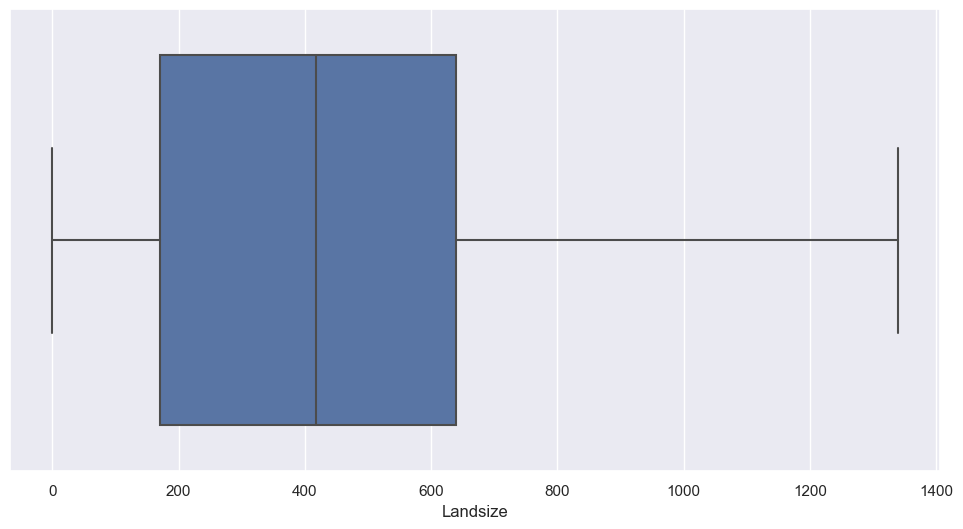

In [183]:
sns.boxplot(x=df['Landsize'])

In [184]:
df.shape

(13208, 13)

In [185]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.488976,0.283010,0.052441,0.941866,0.590436,0.400431,0.513456,0.436859,-0.052236,0.012037,0.098301,-0.075234
Price,0.488976,1.000000,-0.182073,0.111868,0.467904,0.461271,0.223292,0.339077,0.371691,-0.320294,-0.221237,0.204065,-0.038119
Distance,0.283010,-0.182073,1.000000,0.423702,0.284996,0.120678,0.259429,0.407815,0.114711,0.266878,-0.136693,0.243237,-0.046743
Postcode,0.052441,0.111868,0.423702,1.000000,0.057855,0.114454,0.042959,0.069417,0.061105,0.037907,-0.414130,0.451476,0.066232
Bedroom2,0.941866,0.467904,0.284996,0.057855,1.000000,0.581327,0.397404,0.499628,0.427006,-0.040664,0.011966,0.099559,-0.075089
Bathroom,0.590436,0.461271,0.120678,0.114454,0.581327,1.000000,0.314529,0.230655,0.379925,0.159233,-0.074352,0.119238,-0.048107
Car,0.400431,0.223292,0.259429,0.042959,0.397404,0.314529,1.000000,0.398182,0.237294,0.117175,-0.003900,0.061107,-0.021248
Landsize,0.513456,0.339077,0.407815,0.069417,0.499628,0.230655,0.398182,1.000000,0.296890,-0.103027,0.035891,0.156868,-0.060674
BuildingArea,0.436859,0.371691,0.114711,0.061105,0.427006,0.379925,0.237294,0.296890,1.000000,0.028890,-0.035403,0.085622,-0.046387
YearBuilt,-0.052236,-0.320294,0.266878,0.037907,-0.040664,0.159233,0.117175,-0.103027,0.028890,1.000000,0.059606,0.002235,0.001871


<Figure size 1200x600 with 0 Axes>

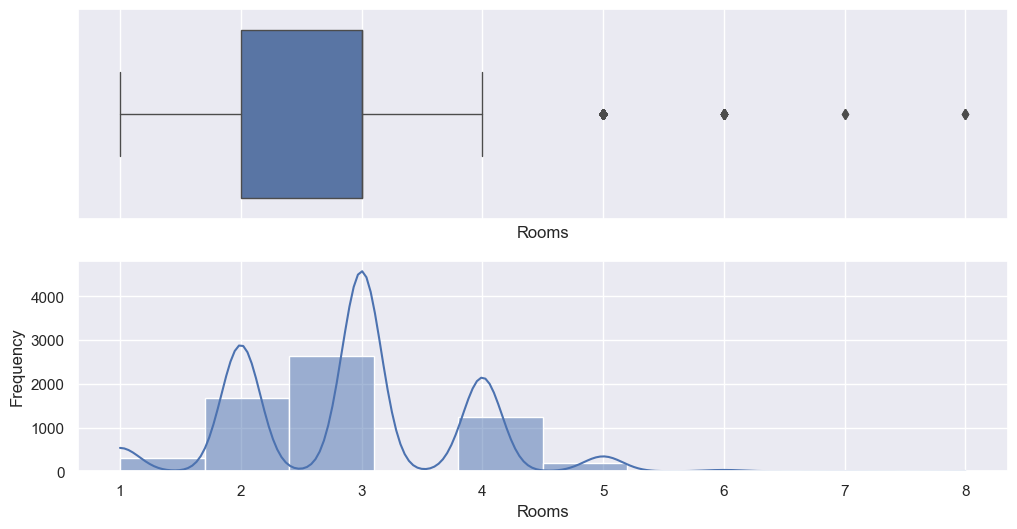

<Figure size 1200x600 with 0 Axes>

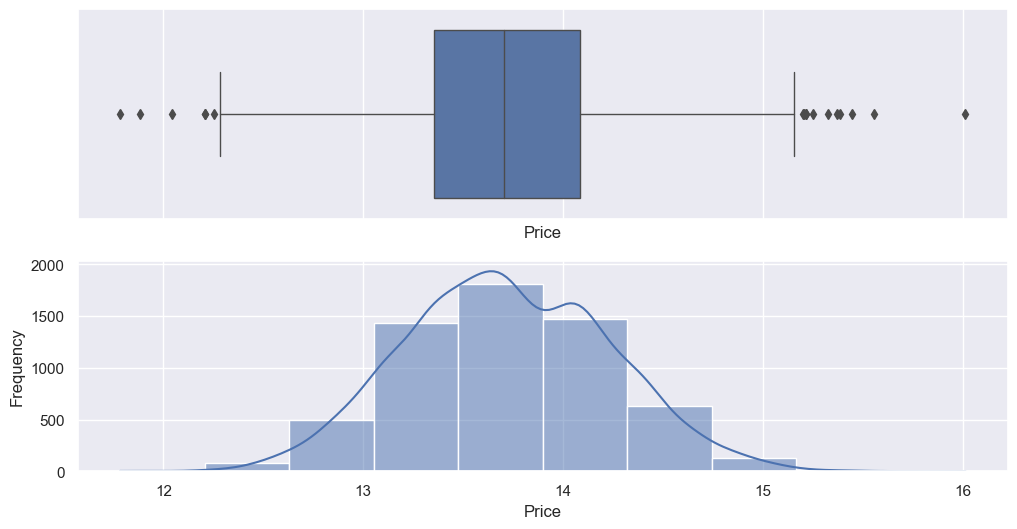

<Figure size 1200x600 with 0 Axes>

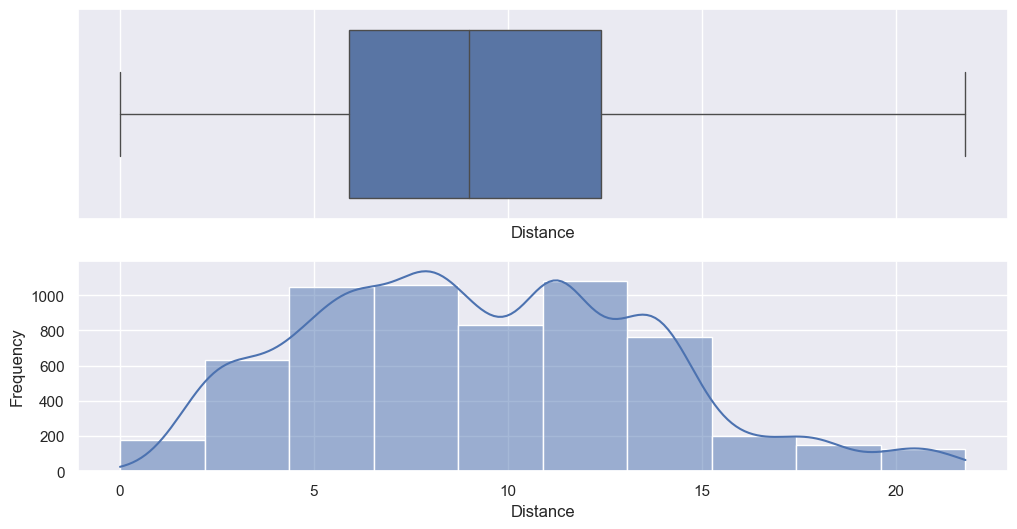

<Figure size 1200x600 with 0 Axes>

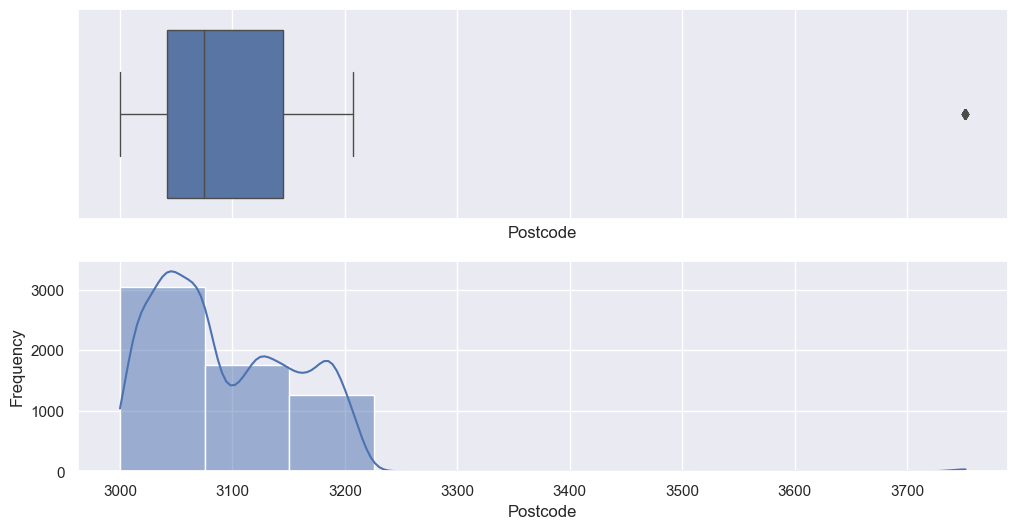

<Figure size 1200x600 with 0 Axes>

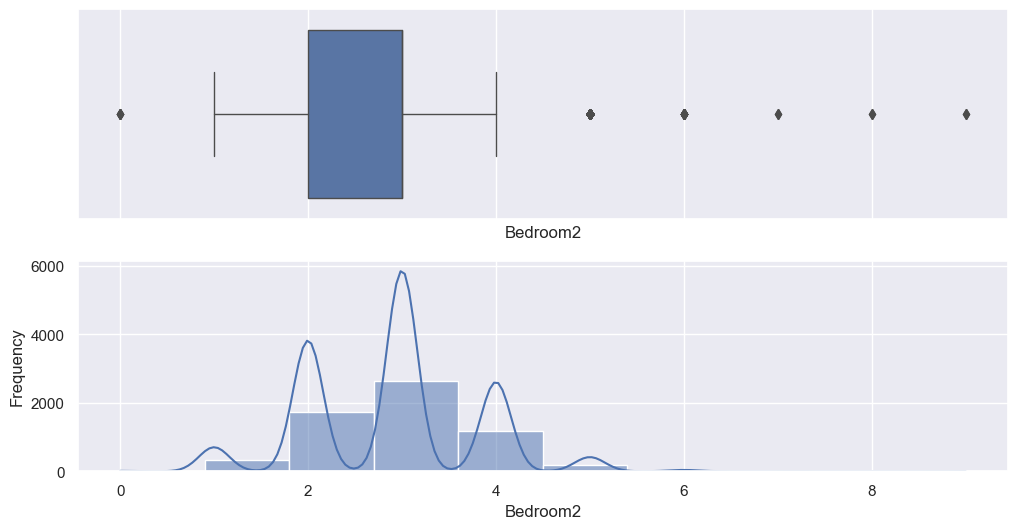

<Figure size 1200x600 with 0 Axes>

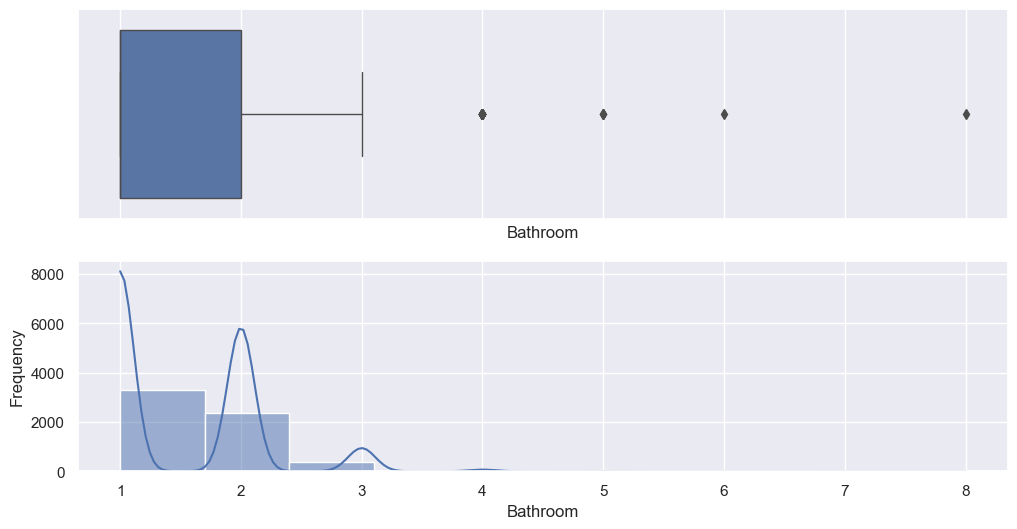

<Figure size 1200x600 with 0 Axes>

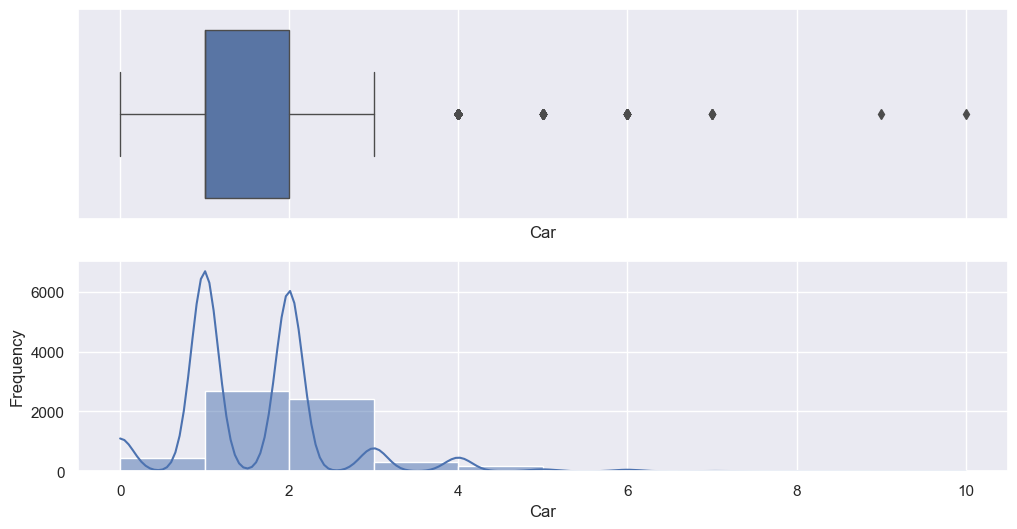

<Figure size 1200x600 with 0 Axes>

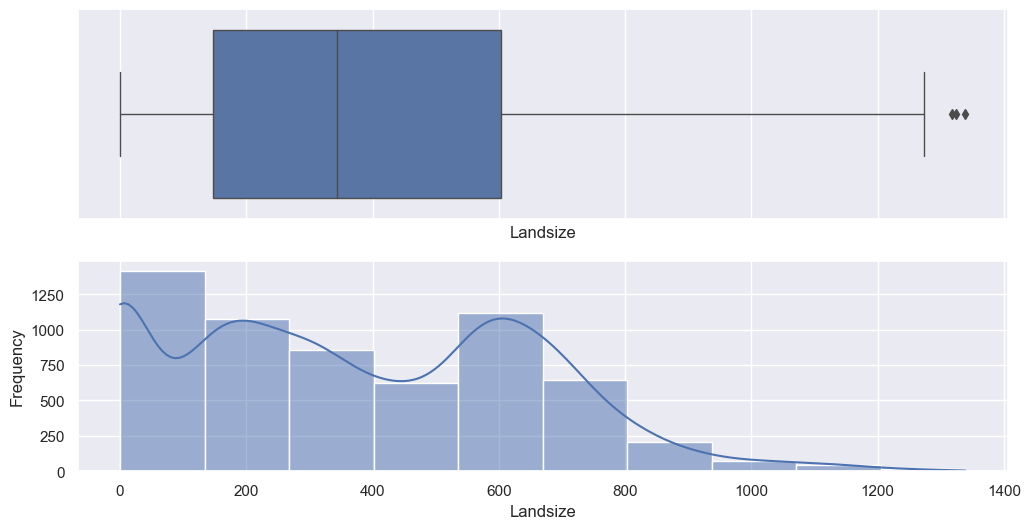

<Figure size 1200x600 with 0 Axes>

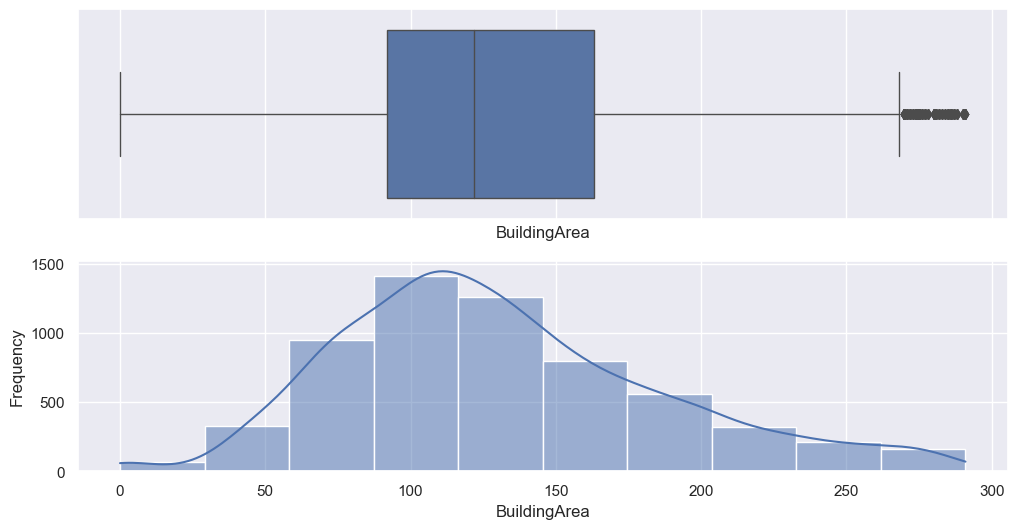

<Figure size 1200x600 with 0 Axes>

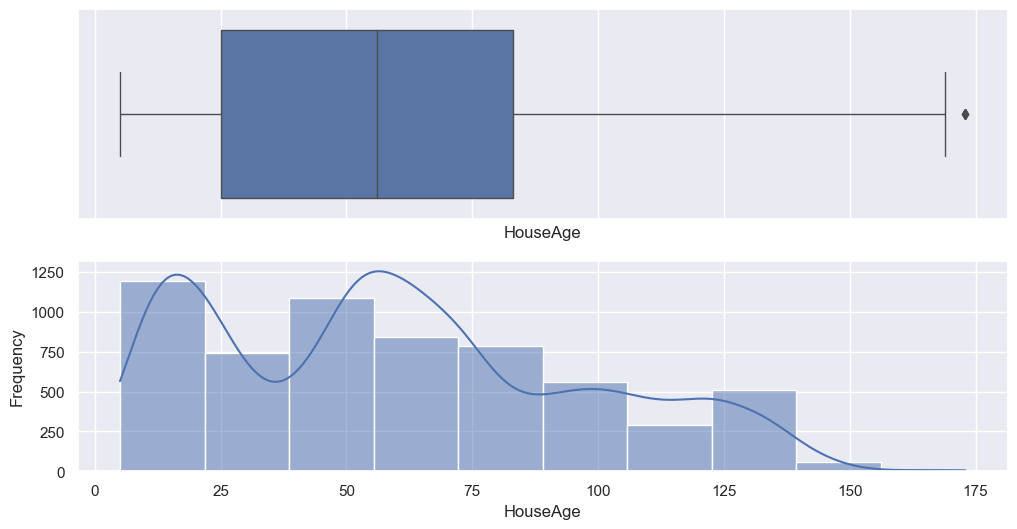

In [246]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(12, 6)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(x=df[i], ax=ax_hist , bins = 10,kde=True)
    plt.show()

In [100]:
df['BuildingArea'].value_counts().sort_index()

0.0       17
1.0       10
2.0       16
3.0       20
4.0        3
          ..
1041.0     1
1143.0     1
1561.0     1
3112.0     1
6791.0     1
Name: BuildingArea, Length: 588, dtype: int64

In [186]:
df['BuildingArea'].value_counts(dropna=False)

NaN       6257
120.00     114
110.00      87
100.00      86
130.00      83
          ... 
225.98       1
9.00         1
103.60       1
63.70        1
368.00       1
Name: BuildingArea, Length: 589, dtype: int64

In [187]:
df.dropna(inplace=True)

In [188]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.512285,0.279775,0.068071,0.954241,0.609350,0.410887,0.543670,0.593093,-0.039455,0.003794,0.092631,-0.094469
Price,0.512285,1.000000,-0.181871,0.111921,0.495040,0.487780,0.230104,0.359309,0.509616,-0.304991,-0.224006,0.210368,-0.051505
Distance,0.279775,-0.181871,1.000000,0.438169,0.286310,0.117885,0.261250,0.403942,0.144432,0.273496,-0.106749,0.218589,-0.053994
Postcode,0.068071,0.111921,0.438169,1.000000,0.071044,0.115111,0.045537,0.087781,0.081361,0.040374,-0.380088,0.435340,0.059137
Bedroom2,0.954241,0.495040,0.286310,0.071044,1.000000,0.612213,0.414969,0.534486,0.577738,-0.029043,0.008595,0.091064,-0.092232
Bathroom,0.609350,0.487780,0.117885,0.115111,0.612213,1.000000,0.327795,0.278886,0.531514,0.172282,-0.071345,0.119101,-0.056934
Car,0.410887,0.230104,0.261250,0.045537,0.414969,0.327795,1.000000,0.415166,0.317168,0.125095,0.000057,0.058170,-0.029902
Landsize,0.543670,0.359309,0.403942,0.087781,0.534486,0.278886,0.415166,1.000000,0.393768,-0.092601,0.034007,0.155692,-0.082334
BuildingArea,0.593093,0.509616,0.144432,0.081361,0.577738,0.531514,0.317168,0.393768,1.000000,0.027182,-0.045422,0.102807,-0.058781
YearBuilt,-0.039455,-0.304991,0.273496,0.040374,-0.029043,0.172282,0.125095,-0.092601,0.027182,1.000000,0.063762,0.000138,0.002564


In [189]:
df.shape

(6659, 13)

In [190]:
df[['YearBuilt']].idxmin()

YearBuilt    9968
dtype: int64

In [191]:
df[df['YearBuilt'] == 1196]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
9968,3,1200000.0,14.2,3149.0,3.0,1.0,4.0,807.0,117.0,1196.0,-37.86788,145.12121,13366.0


In [132]:
df.index

Int64Index([    1,     2,     4,     6,     7,     9,    11,    12,    15,
               16,
            ...
            13560, 13563, 13564, 13568, 13571, 13572, 13573, 13576, 13578,
            13579],
           dtype='int64', length=6659)

In [192]:
df = df.reset_index()

In [193]:
df.idxmin()

index               0
Rooms              19
Price             969
Distance         4864
Postcode         2145
Bedroom2          433
Bathroom            0
Car                 0
Landsize            7
BuildingArea     2351
YearBuilt        4993
Lattitude        4506
Longtitude       5524
Propertycount    3896
dtype: int64

In [194]:
df.drop(columns='index', inplace=True)

In [195]:
df.drop(df['YearBuilt'].idxmin(), inplace=True)

In [196]:
df['YearBuilt'].describe()

count    6658.000000
mean     1964.148693
std        36.505141
min      1850.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [241]:
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

outliers = []

for out in df['Distance']:
    if out < lower_tail or out > upper_tail:
        outliers.append(out)

len(outliers)

58

In [242]:
df.drop(df[df['Distance'] < lower_tail].index, inplace=True)
df.drop(df[df['Distance'] > upper_tail].index, inplace=True)

In [202]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.532198,0.300480,0.024211,0.953055,0.611518,0.414941,0.541874,0.593926,-0.052125,0.019371,0.099527,-0.099980
Price,0.532198,1.000000,-0.137949,0.246990,0.515267,0.499355,0.243036,0.387353,0.520889,-0.308797,-0.269088,0.241243,-0.051030
Distance,0.300480,-0.137949,1.000000,0.169942,0.305844,0.139110,0.293242,0.412481,0.166412,0.304298,0.013523,0.238597,-0.094822
Postcode,0.024211,0.246990,0.169942,1.000000,0.025064,0.120824,0.015295,0.017709,0.074592,-0.023918,-0.536725,0.584192,0.061630
Bedroom2,0.953055,0.515267,0.305844,0.025064,1.000000,0.614449,0.418866,0.531891,0.578130,-0.041444,0.025281,0.097415,-0.097792
Bathroom,0.611518,0.499355,0.139110,0.120824,0.614449,1.000000,0.333513,0.281988,0.529908,0.171227,-0.076911,0.126824,-0.061234
Car,0.414941,0.243036,0.293242,0.015295,0.418866,0.333513,1.000000,0.418698,0.320572,0.133006,0.014907,0.060293,-0.038493
Landsize,0.541874,0.387353,0.412481,0.017709,0.531891,0.281988,0.418698,1.000000,0.398857,-0.105718,0.060407,0.157263,-0.088762
BuildingArea,0.593926,0.520889,0.166412,0.074592,0.578130,0.529908,0.320572,0.398857,1.000000,0.018572,-0.042282,0.103391,-0.066174
YearBuilt,-0.052125,-0.308797,0.304298,-0.023918,-0.041444,0.171227,0.133006,-0.105718,0.018572,1.000000,0.082552,-0.003759,0.003585


In [209]:
Q1 = df['BuildingArea'].quantile(0.25)
Q3 = df['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

outliers = []

for out in df['BuildingArea']:
    if out < lower_tail or out > upper_tail:
        outliers.append(out)

len(outliers)

302

In [205]:
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

outliers = []

for out in df['YearBuilt']:
    if out < lower_tail or out > upper_tail:
        outliers.append(out)

len(outliers)

[1850.0, 1850.0, 1850.0]

In [210]:
df.drop(df[df['BuildingArea'] < lower_tail].index, inplace=True)
df.drop(df[df['BuildingArea'] > upper_tail].index, inplace=True)

In [213]:
df['HouseAge'] = 2023 - df['YearBuilt'].astype('int')

In [215]:
df.drop(columns='YearBuilt', inplace=True)

In [226]:
df.Price.skew()

0.08856565738454333

In [225]:
import numpy as np
df['Price'] = np.log(df['Price'])

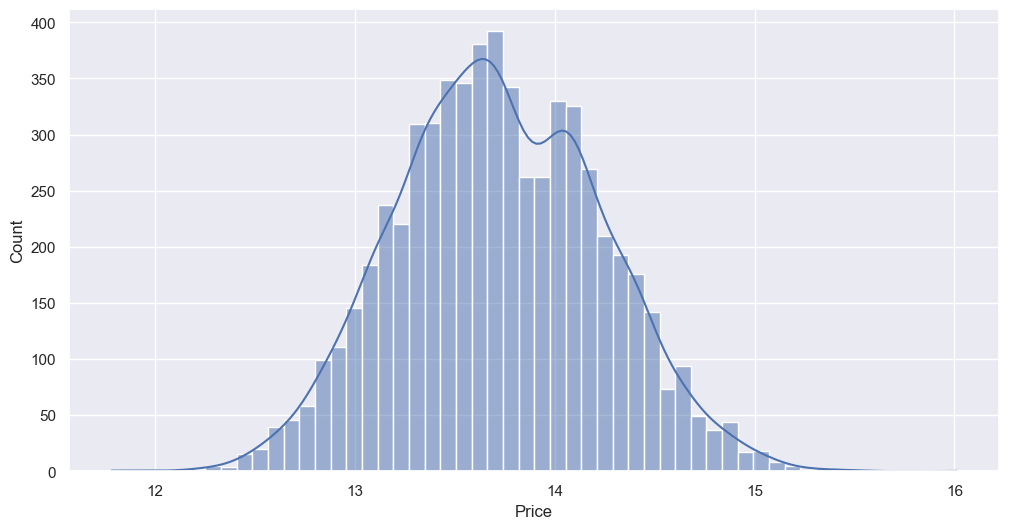

In [227]:
sns.histplot(x=df['Price'], kde=True )
plt.show()

In [229]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,HouseAge
0,2,13.849912,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,-37.80790,144.99340,4019.0,123
1,3,14.197366,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,-37.80930,144.99440,4019.0,123
2,4,14.285514,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,-37.80720,144.99410,4019.0,9
3,3,14.444652,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,-37.80240,144.99930,4019.0,113
4,2,14.307765,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,-37.80600,144.99540,4019.0,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,2,13.384728,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,-37.70657,145.07878,2329.0,17
6655,4,13.361380,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,-37.89327,144.64789,16166.0,43
6656,3,13.846040,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,-37.85927,144.87904,6380.0,28
6657,4,14.731801,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,-37.85908,144.89299,6380.0,103


In [232]:
df.drop_duplicates(inplace=True)

In [235]:
df.drop(columns=['Lattitude', 'Longtitude', 'Propertycount', ], inplace=True)

In [245]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,HouseAge
Rooms,1.000000,0.572412,0.309310,-0.003859,0.950936,0.571558,0.398163,0.511726,0.734701,0.083949
Price,0.572412,1.000000,-0.126232,0.235151,0.553687,0.439249,0.237109,0.378472,0.629166,0.407514
Distance,0.309310,-0.126232,1.000000,0.141203,0.313563,0.139008,0.302853,0.419291,0.227965,-0.300461
Postcode,-0.003859,0.235151,0.141203,1.000000,-0.002247,0.102053,0.002710,-0.008772,0.050522,0.037246
Bedroom2,0.950936,0.553687,0.313563,-0.002247,1.000000,0.574962,0.401767,0.502428,0.711260,0.074445
Bathroom,0.571558,0.439249,0.139008,0.102053,0.574962,1.000000,0.309671,0.216388,0.615900,-0.155429
Car,0.398163,0.237109,0.302853,0.002710,0.401767,0.309671,1.000000,0.403960,0.382319,-0.124387
Landsize,0.511726,0.378472,0.419291,-0.008772,0.502428,0.216388,0.403960,1.000000,0.457053,0.129070
BuildingArea,0.734701,0.629166,0.227965,0.050522,0.711260,0.615900,0.382319,0.457053,1.000000,0.026685
HouseAge,0.083949,0.407514,-0.300461,0.037246,0.074445,-0.155429,-0.124387,0.129070,0.026685,1.000000


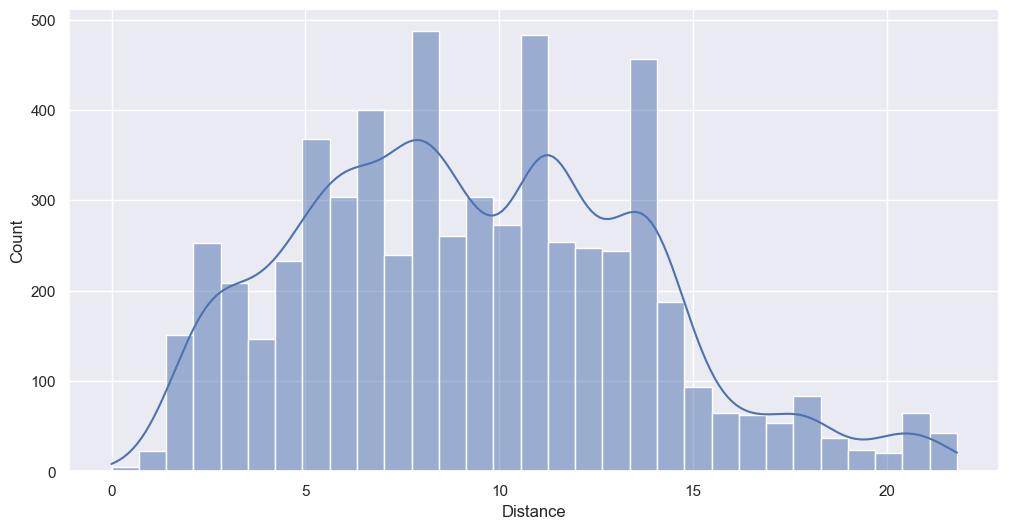

In [244]:
sns.histplot(x=df['Distance'], kde=True )
plt.show()

In [249]:
df.drop(columns='Distance', inplace=True)

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [256]:
df

,Rooms,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,HouseAge
0,2,3067.0,2.0,1.0,0.0,156.0,79.0,123
1,3,3067.0,3.0,2.0,0.0,134.0,150.0,123
2,4,3067.0,3.0,1.0,2.0,120.0,142.0,9
3,3,3067.0,4.0,2.0,0.0,245.0,210.0,113
4,2,3067.0,2.0,1.0,2.0,256.0,107.0,133
...,...,...,...,...,...,...,...,...
6654,2,3087.0,2.0,1.0,1.0,210.0,79.0,17
6655,4,3030.0,4.0,2.0,1.0,662.0,172.0,43
6656,3,3016.0,3.0,2.0,2.0,333.0,133.0,28
6657,4,3016.0,4.0,1.0,5.0,866.0,157.0,103


In [261]:

X = df.copy()


In [262]:
X.shape, y.shape

((6066, 8), (6066,))

In [265]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

In [267]:
model = LinearRegression()

model.fit(X_train, y_train)
preds = model.predict(X_valid)

In [268]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_valid, preds)

0.2409535594671355

In [270]:
model.score(X_valid, y_valid)

0.6057321392761861